<a href="https://colab.research.google.com/github/daloqily/data-science/blob/main/hotel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set up environment :

- import libraries


In [1]:
#@title
import numpy as np
import pandas as pd
import seaborn as sb
import missingno as msno
import matplotlib.pyplot as plt


- read data 

In [2]:
#@title
url='https://drive.google.com/file/d/1nh0lLGEqB-YroANsz072aqu4867KhpSw/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# 2. The Data at a glance





In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
#@title
print("data shape:", df.shape)

data shape: (119390, 32)


In [6]:
#@title
print("Data Variables: \n")
df.info()

Data Variables: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12

In [7]:
#@title
df.describe(include = ['O'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
#@title
print("missing data in columns")
df.isnull().sum()

missing data in columns


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- Over 95% of **company variable** is missing values
- Around 14% of **agent** is also missing values

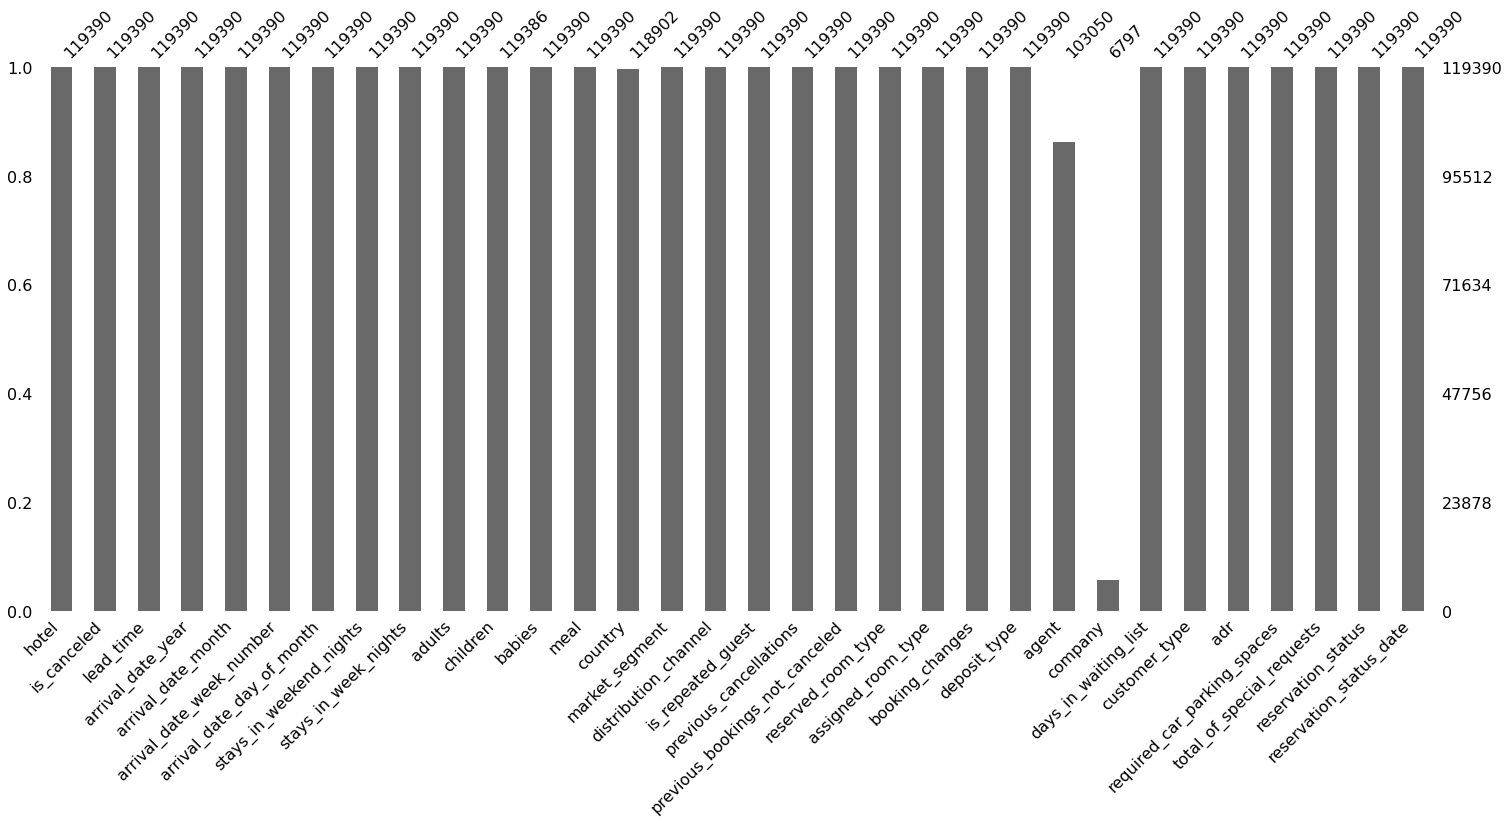

In [9]:
#@title
msno.bar(df)

- it is better to drop the **company variable** since most of it is null


In [10]:
df.drop(df.columns[24], axis=1, inplace=True)

- fill the missing values in **agent** to 'non-specified'


In [11]:
df['agent'] = df['agent'].fillna("non-specified")

In [12]:
df['agent'].value_counts()

9.0              31961
non-specified    16340
240.0            13922
1.0               7191
14.0              3640
                 ...  
280.0                1
285.0                1
289.0                1
265.0                1
497.0                1
Name: agent, Length: 334, dtype: int64

- Comparing **deposit type/customer type** with amount of **cancellations** to look for a relationship

# 3. Numerical analysis and visualization


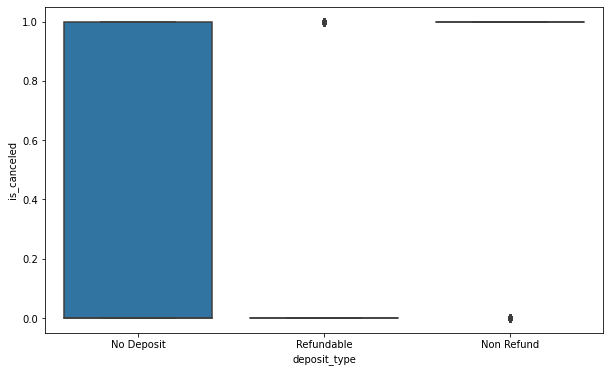

In [13]:
#@title
plt.figure(figsize=(10,6))
sb.boxplot(x=df['deposit_type'], y=df['is_canceled'])

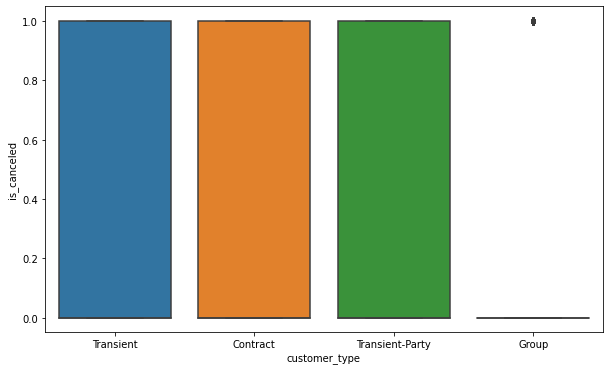

In [14]:
#@title
plt.figure(figsize=(10,6))
sb.boxplot(x=df['customer_type'], y=df['is_canceled'])

- Knowing the highest & average range of average day rate (adr) of each hotel could give an insight on the sales of that day/month

Top Value: 5670.319


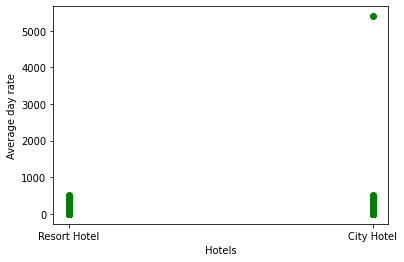

In [15]:
#@title
plt.scatter(df['hotel'], df['adr'], color='g')
#plt.ylim(0,600) #set the range 
bottom,top = plt.ylim()
left,right = plt.ylim()
print("Top Value:",right)
plt.xlabel('Hotels')
plt.ylabel('Average day rate')
plt.show()


- closer look at the adr range, highest value (outlire) excluded

(0.0, 600.0)

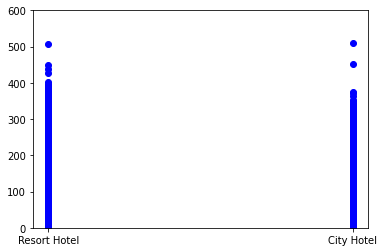

In [16]:
#@title
plt.scatter(df['hotel'], df['adr'], color='blue')
plt.ylim(0,600) #set the range 

- Know the **nights** a **repeated guest** usually book, and as shows below, they usually stay in week nights

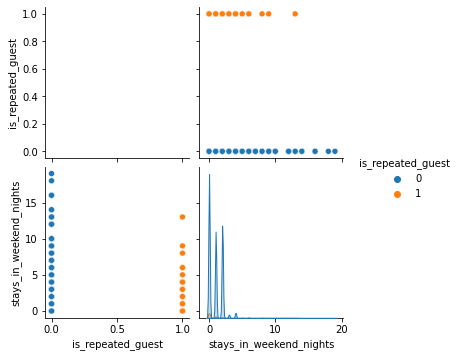

In [17]:
#@title
sb.pairplot(data=df, vars=['is_repeated_guest','stays_in_weekend_nights'],  hue='is_repeated_guest')

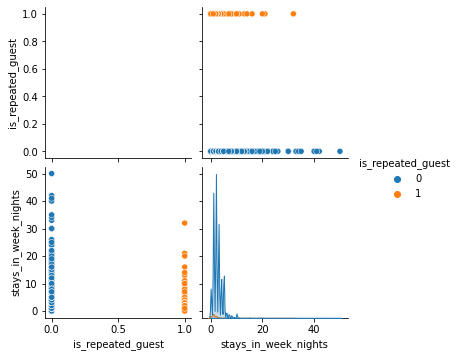

In [18]:
#@title
sb.pairplot(data=df, vars=['is_repeated_guest','stays_in_week_nights'],  hue='is_repeated_guest')

- a comparision to inspect if **waiting list** has an effect on **cancellation**

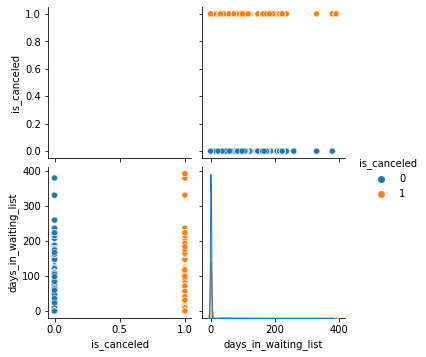

In [19]:
#@title
sb.pairplot(data=df, vars=['is_canceled','days_in_waiting_list'],  hue='is_canceled')

- A function to convert 'arrival_date_month' from abbrevation to numerical

In [20]:
#@title
#create a column for months in numerical 
#import calendar

#d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
#df['arrival_date_month'].str.lower()
#df['arrival_month_num'] = ''

#def abbr_to_num():
 # for x in df['arrival_date_month']:
  #  for k, v in enumerate(calendar.month_abbr):
   #    if v == x:
    #     df['arrival_month_num'] = df['arrival_month_num'].append(k) 
     #    break

#abbr_to_num()


- Created new variables to know the guest type: family - individuals, to look for further insighits

In [21]:
df['is_family'] = np.where(( df['children']>0 ) , 1, 0)


In [22]:
df['is_individual'] = np.where(( df['adults']<2 ) , 1, 0)

In [23]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,is_individual
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,0,Transient,151.20,0,2,Check-Out,2017-09-07,0,0


- from the bar below is could be concluded that most reserrvation are done either by couples of 2 or families 

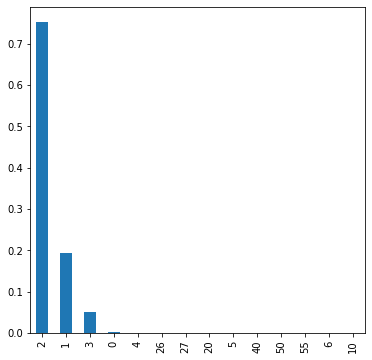

In [24]:
#@title
df['adults'].value_counts(normalize=True).plot(kind='bar',figsize=(6,6))

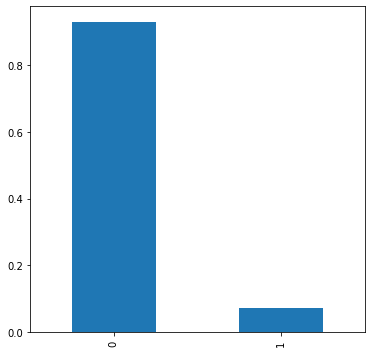

In [25]:
#@title
df['is_family'].value_counts(normalize=True).plot(kind='bar',figsize=(6,6))

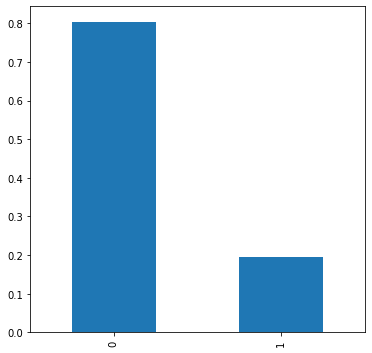

In [26]:
#@title
df['is_individual'].value_counts(normalize=True).plot(kind='bar',figsize=(6,6))

# 4. Categorical analysis and visualization




- The following pie charts shows the most frequent values of each variable, which could indicate where does customers mostly book and pay from

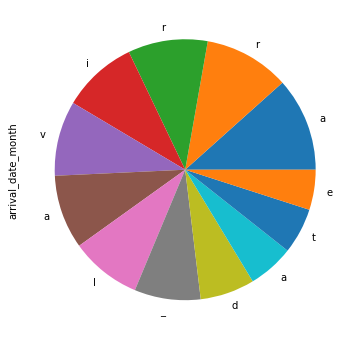

In [27]:
#@title
df['arrival_date_month'].value_counts().plot(kind='pie',labels='arrival_date_month',figsize=(6,6))

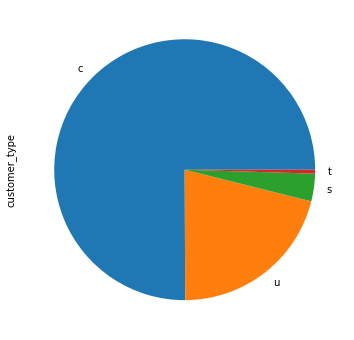

In [28]:
#@title
df['customer_type'].value_counts().plot(kind='pie',labels='customer_type',figsize=(6,6))

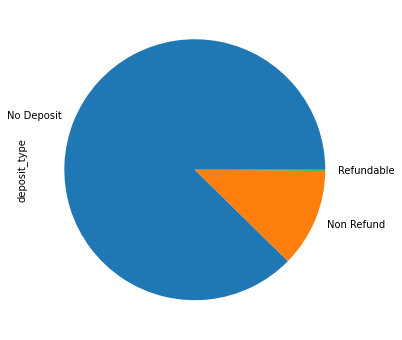

In [29]:
#@title
df['deposit_type'].value_counts().plot(kind='pie',figsize=(6,6))

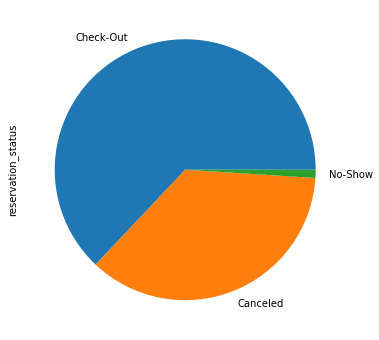

In [30]:
#@title
df['reservation_status'].value_counts().plot(kind='pie',figsize=(6,6))

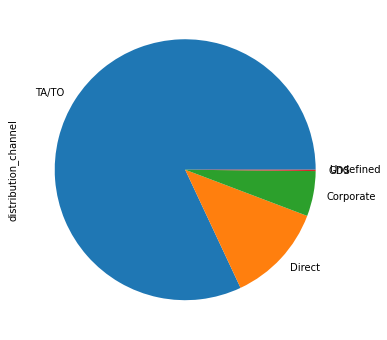

In [31]:
#@title
df['distribution_channel'].value_counts().plot(kind='pie',figsize=(6,6))

**meal** :Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package;
  -  BB – Bed & Breakfast;
  -  HB – Half board (breakfast and one other meal – usually dinner);
  - FB – Full board (breakfast, lunch and dinner 


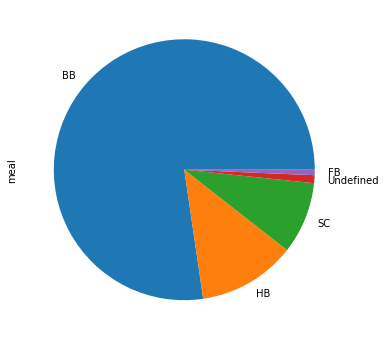

In [32]:
#@title
df['meal'].value_counts().plot(kind='pie',figsize=(6,6))

Text(0.5, 0, 'Types of market segmnets')

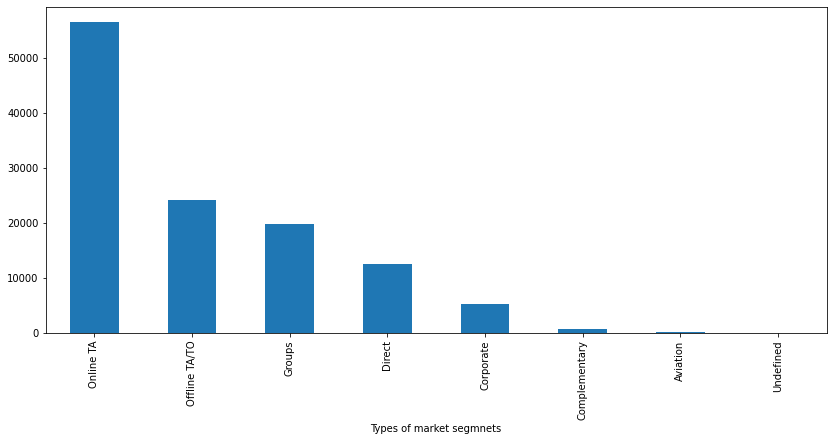

In [33]:
#@title
ax = df['market_segment'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_xlabel('Types of market segmnets')

- in the following graph of arrival date month, it shows that August has more frequent reservations

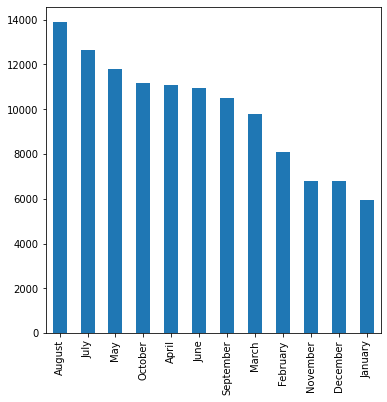

In [34]:
#@title
df['arrival_date_month'].value_counts().plot(kind='bar',figsize=(6,6))

# 5. Data Visualising


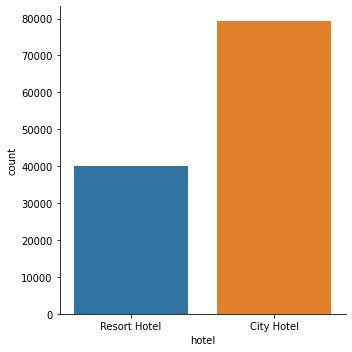

In [35]:
#@title
# Explore Target distribution 

sb.catplot(x="hotel", kind="count", data= df)

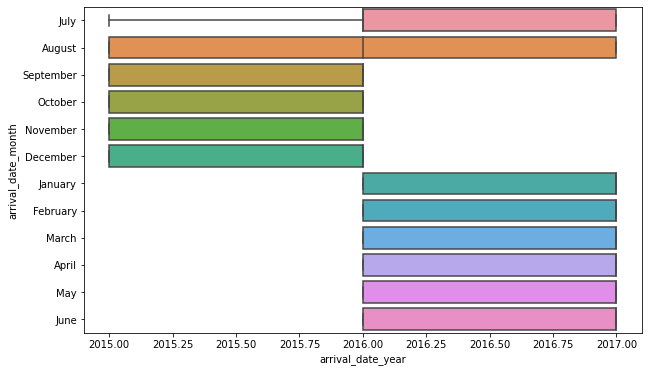

In [36]:
#@title
plt.figure(figsize=(10,6))
sb.boxplot(x=df['arrival_date_year'], y=df['arrival_date_month'])

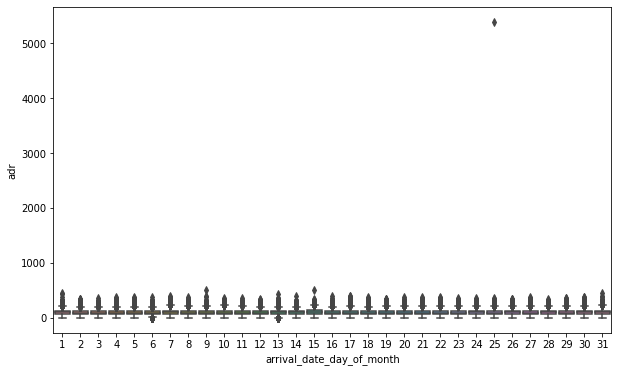

In [37]:
#@title
plt.figure(figsize=(10,6))
sb.boxplot(x=df['arrival_date_day_of_month'], y=df['adr'])

<Figure size 432x288 with 0 Axes>

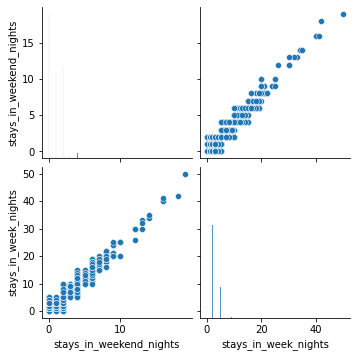

In [38]:
#@title
plt.figure()

sb.pairplot(df[['stays_in_weekend_nights', 'stays_in_week_nights']], markers=["o", "s"])

plt.show()

- The following 2 figures , shows that during the years of all reservations, weekend_nights were booked more than week_nights

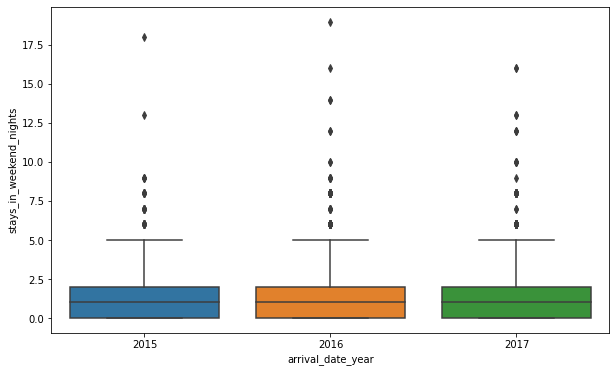

In [39]:
#@title
plt.figure(figsize=(10,6))
sb.boxplot(x=df['arrival_date_year'], y=df['stays_in_weekend_nights'])

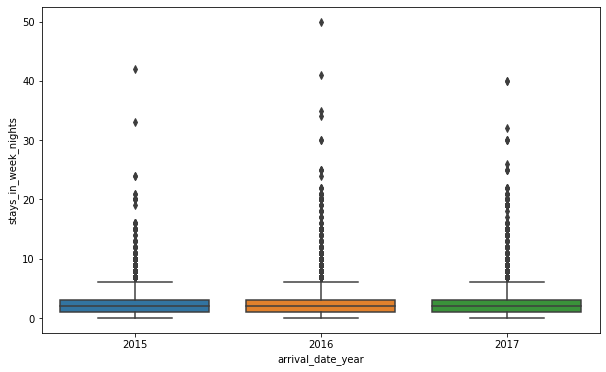

In [40]:
plt.figure(figsize=(10,6))
sb.boxplot(x=df['arrival_date_year'], y=df['stays_in_week_nights'])

- The heatmap that shows the crrelation of the chosen variables 

In [41]:
#@title
df_num = df[['is_canceled','arrival_date_year','stays_in_week_nights','stays_in_weekend_nights','is_family','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','is_individual']].copy()

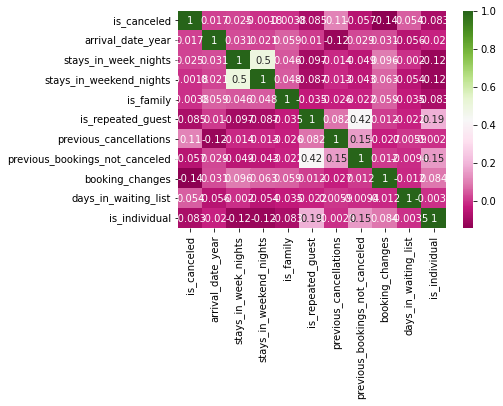

In [42]:
#@title
dataplot = sb.heatmap(df_num.corr(), cmap="PiYG", annot=True)

- The pairplot below shows the relationship between each variables


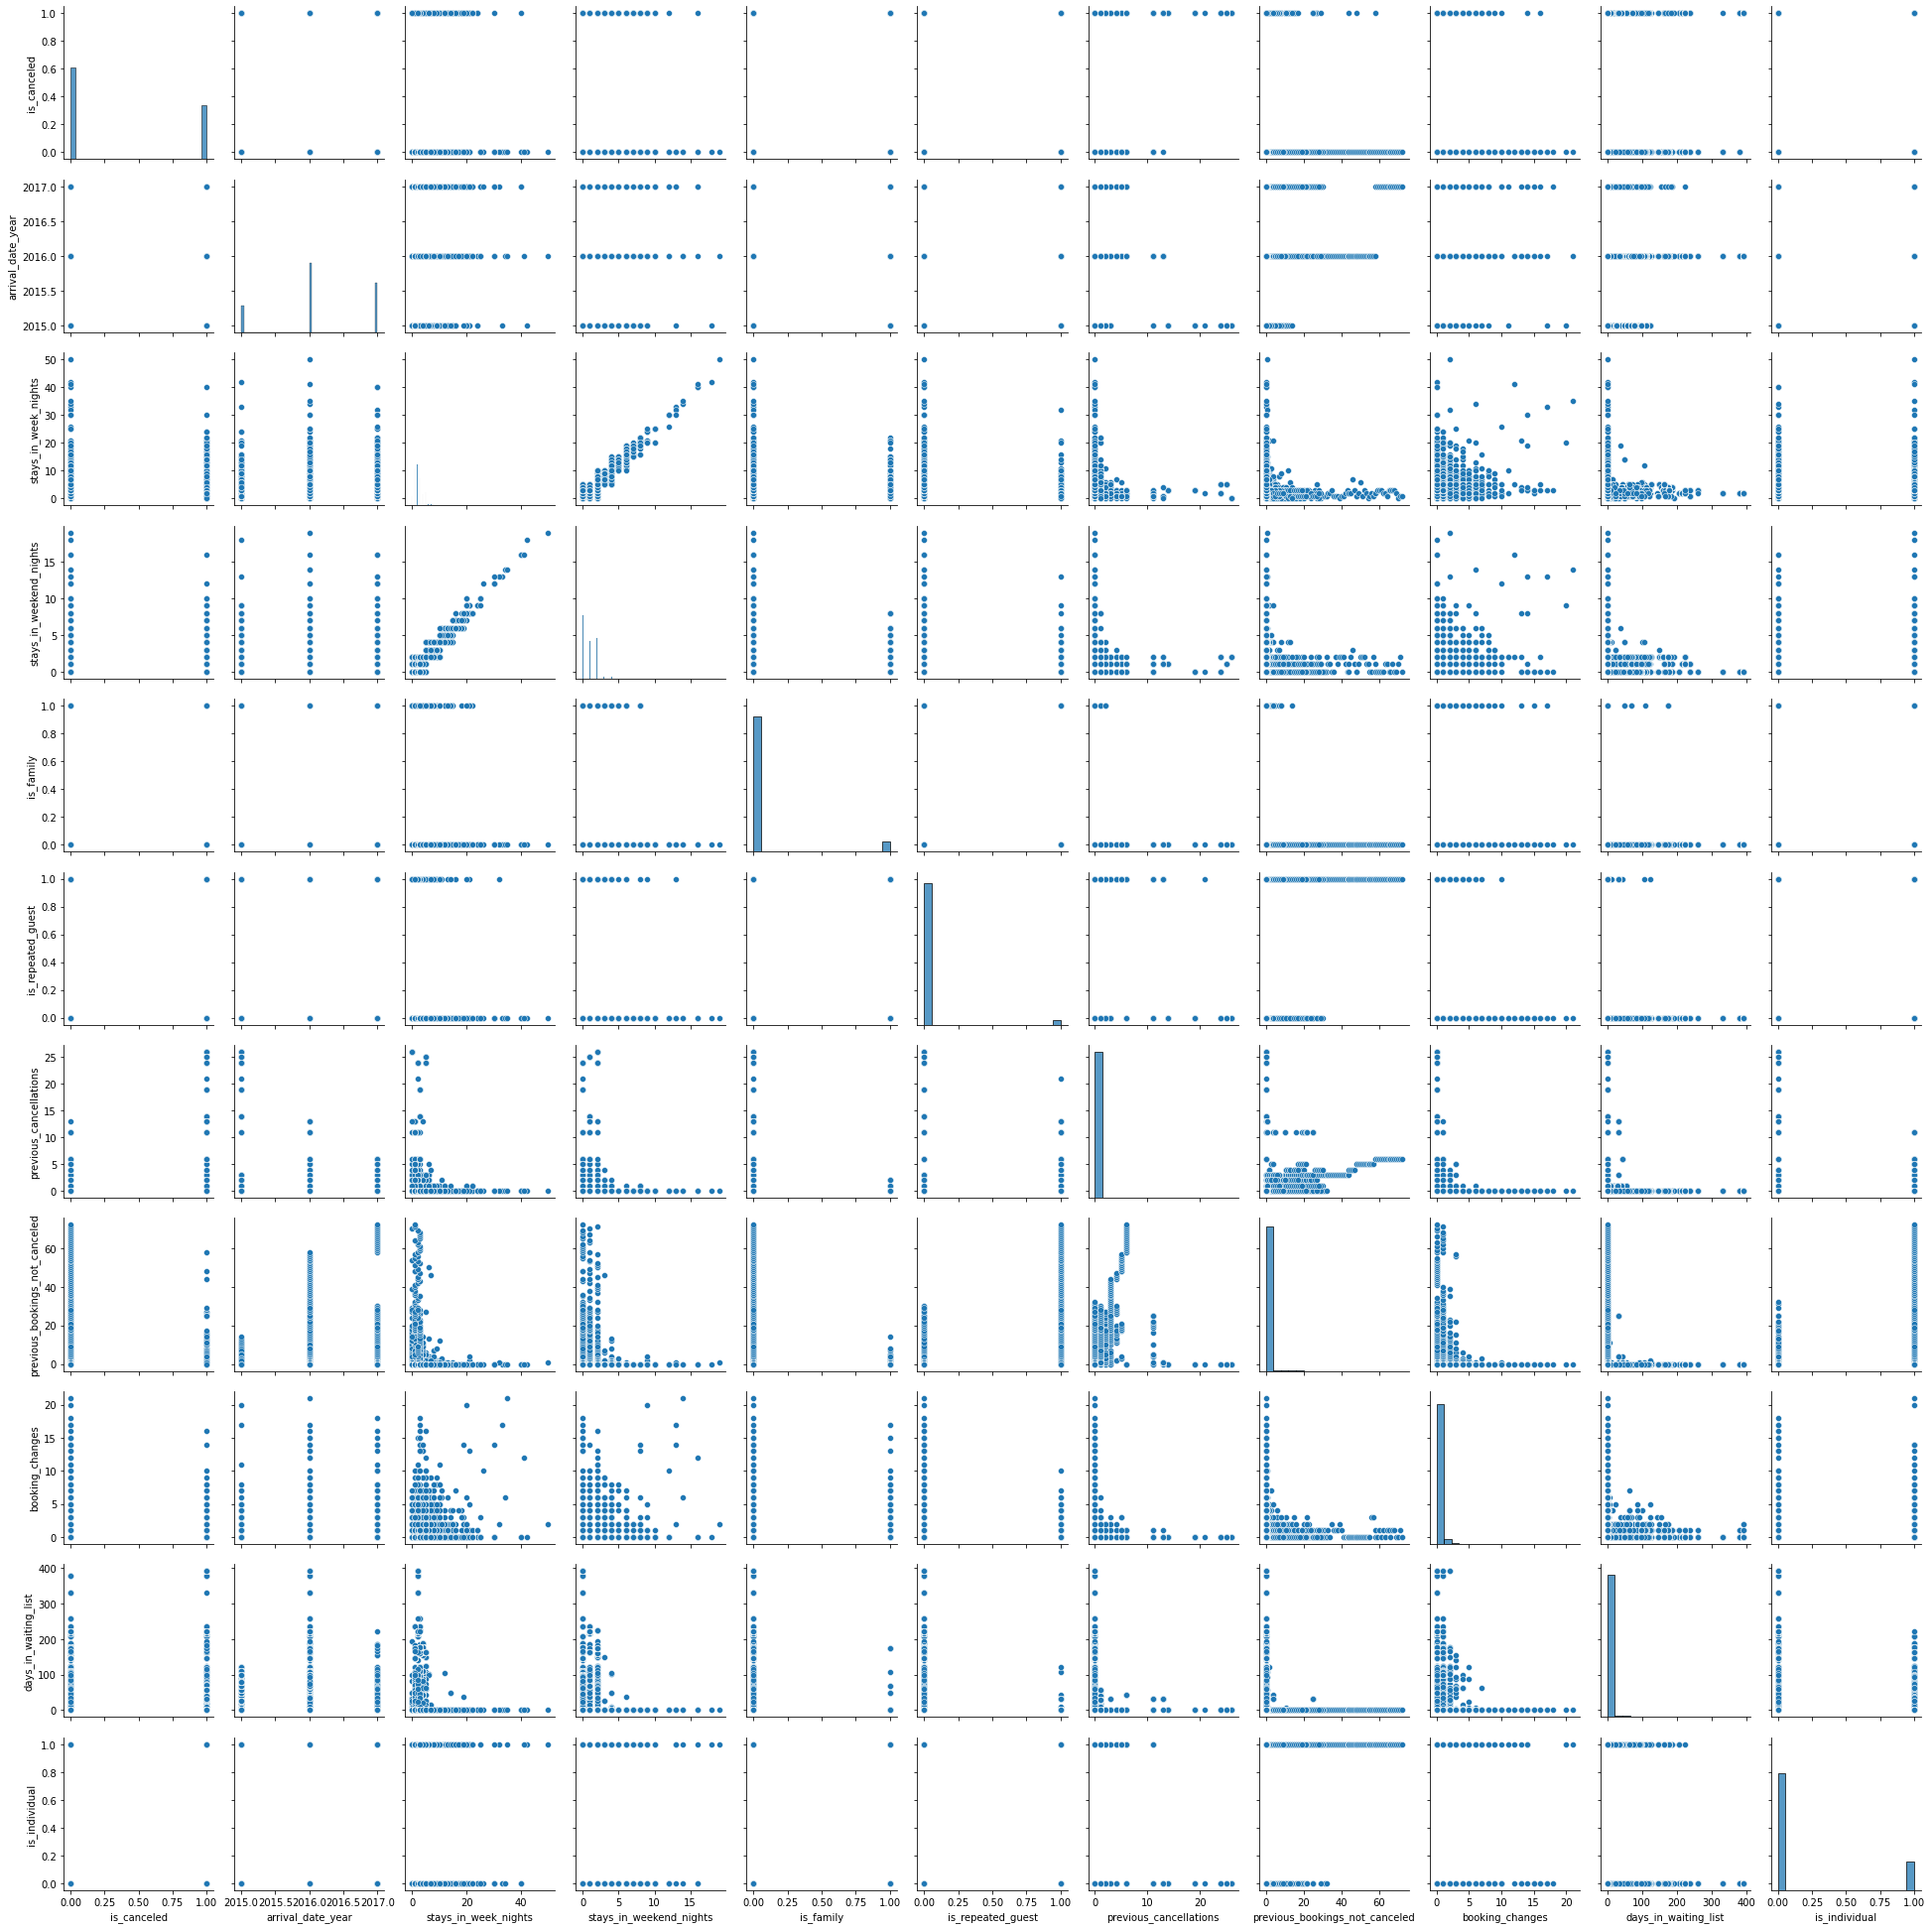

In [43]:
#@title
sb.pairplot(df_num)